In [3]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

# Study data files
complaints_metadata_path = "data/complaints.csv"

# Read data to study results
complaints_metadata = pd.read_csv(complaints_metadata_path)

# Display table
complaints_metadata.head(2)

,Date received,Product,Sub-product,Issue,Sub-issue,Consumer complaint narrative,Company public response,Company,State,ZIP code,Tags,Consumer consent provided?,Submitted via,Date sent to company,Company response to consumer,Timely response?,Consumer disputed?,Complaint ID
0,2021-08-02,"Credit reporting, credit repair services, or o...",Credit reporting,Incorrect information on your report,Information belongs to someone else,NaN,NaN,"EQUIFAX, INC.",TN,37221,NaN,Consent not provided,Web,2021-08-02,Closed with explanation,Yes,NaN,4595998
1,2022-01-12,Credit card or prepaid card,General-purpose credit card or charge card,Problem when making payments,Problem during payment process,"Twice now, the checking account linked to my P...",Company has responded to the consumer and the ...,SYNCHRONY FINANCIAL,RI,028XX,NaN,Consent provided,Web,2022-01-12,Closed with monetary relief,Yes,NaN,5105568


In [38]:
len(complaints_metadata)

7027068

In [39]:
# Data types of columns
complaints_metadata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7027068 entries, 0 to 7027067
Data columns (total 18 columns):
 #   Column                        Dtype 
---  ------                        ----- 
 0   Date received                 object
 1   Product                       object
 2   Sub-product                   object
 3   Issue                         object
 4   Sub-issue                     object
 5   Consumer complaint narrative  object
 6   Company public response       object
 7   Company                       object
 8   State                         object
 9   ZIP code                      object
 10  Tags                          object
 11  Consumer consent provided?    object
 12  Submitted via                 object
 13  Date sent to company          object
 14  Company response to consumer  object
 15  Timely response?              object
 16  Consumer disputed?            object
 17  Complaint ID                  int64 
dtypes: int64(1), object(17)
memory usage: 965.

In [5]:
# Drop Consumer Disputed, Tags, Consumer Complaint Narrative column
complaints_database = complaints_metadata.drop(['Consumer disputed?','Tags','Consumer complaint narrative'], axis=1)

In [6]:
# Clean header row to lower case
complaints_db = complaints_database.rename(columns=str.lower)
complaints_db

,date received,product,sub-product,issue,sub-issue,company public response,company,state,zip code,consumer consent provided?,submitted via,date sent to company,company response to consumer,timely response?,complaint id
0,2021-08-02,"Credit reporting, credit repair services, or o...",Credit reporting,Incorrect information on your report,Information belongs to someone else,NaN,"EQUIFAX, INC.",TN,37221,Consent not provided,Web,2021-08-02,Closed with explanation,Yes,4595998
1,2022-01-12,Credit card or prepaid card,General-purpose credit card or charge card,Problem when making payments,Problem during payment process,Company has responded to the consumer and the ...,SYNCHRONY FINANCIAL,RI,028XX,Consent provided,Web,2022-01-12,Closed with monetary relief,Yes,5105568
2,2022-01-06,Credit card or prepaid card,General-purpose credit card or charge card,"Other features, terms, or problems",Other problem,NaN,CAPITAL ONE FINANCIAL CORPORATION,CA,92103,Consent provided,Web,2022-01-06,Closed with explanation,Yes,5080127
3,2022-01-06,"Credit reporting, credit repair services, or o...",Credit reporting,Incorrect information on your report,Account status incorrect,Company has responded to the consumer and the ...,Experian Information Solutions Inc.,PA,191XX,Consent provided,Web,2022-01-06,Closed with explanation,Yes,5081028
4,2022-01-06,"Credit reporting, credit repair services, or o...",Credit reporting,Incorrect information on your report,Information belongs to someone else,Company has responded to the consumer and the ...,"TRANSUNION INTERMEDIATE HOLDINGS, INC.",VA,23234,Consent provided,Web,2022-01-06,Closed with non-monetary relief,Yes,5079989
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7027063,2017-02-02,Credit reporting,NaN,Unable to get credit report/credit score,Problem getting report or credit score,NaN,"EQUIFAX, INC.",CA,90059,NaN,Postal mail,2017-02-07,Closed with explanation,Yes,2321396
7027064,2022-07-27,"Credit reporting, credit repair services, or o...",Credit reporting,Incorrect information on your report,Personal information incorrect,NaN,"EQUIFAX, INC.",GA,30135,Consent not provided,Web,2022-07-27,Closed with explanation,Yes,5817386
7027065,2015-10-27,Credit reporting,NaN,Credit reporting company's investigation,No notice of investigation status/result,NaN,"EQUIFAX, INC.",CA,92082,Consent not provided,Web,2015-10-27,Closed with explanation,Yes,1626081
7027066,2022-10-21,Debt collection,Credit card debt,Attempts to collect debt not owed,Debt is not yours,NaN,ENCORE CAPITAL GROUP INC.,AR,72086,Consent not provided,Web,2022-10-21,Closed with non-monetary relief,Yes,6113755


In [7]:
complaints_db.count()

date received                   7027068
product                         7027068
sub-product                     6791773
issue                           7027062
sub-issue                       6269273
company public response         3470905
company                         7027068
state                           6977595
zip code                        6996840
consumer consent provided?      5759827
submitted via                   7027068
date sent to company            7027068
company response to consumer    7027048
timely response?                7027068
complaint id                    7027068
dtype: int64

In [8]:
# Preview of complaints database
complaints_db.head(2)

,date received,product,sub-product,issue,sub-issue,company public response,company,state,zip code,consumer consent provided?,submitted via,date sent to company,company response to consumer,timely response?,complaint id
0,2021-08-02,"Credit reporting, credit repair services, or o...",Credit reporting,Incorrect information on your report,Information belongs to someone else,NaN,"EQUIFAX, INC.",TN,37221,Consent not provided,Web,2021-08-02,Closed with explanation,Yes,4595998
1,2022-01-12,Credit card or prepaid card,General-purpose credit card or charge card,Problem when making payments,Problem during payment process,Company has responded to the consumer and the ...,SYNCHRONY FINANCIAL,RI,028XX,Consent provided,Web,2022-01-12,Closed with monetary relief,Yes,5105568


In [9]:
# Convert Date Received and Date Sent To Company to datetime
complaints_db['date received'] = pd.to_datetime(complaints_db['date received'])
complaints_db['date sent to company'] = pd.to_datetime(complaints_db['date sent to company'])

In [10]:
complaints_db['timely response?'] = complaints_db['timely response?'].replace({'Yes': True, 'No': False})
#complaints_db['Consumer disputed?'] = complaints_db['Consumer disputed?'].replace({'Yes': True, 'No': False})

C:\Users\janak\AppData\Local\Temp\ipykernel_24892\3738152284.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  complaints_db['timely response?'] = complaints_db['timely response?'].replace({'Yes': True, 'No': False})


In [11]:
complaints_db.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7027068 entries, 0 to 7027067
Data columns (total 15 columns):
 #   Column                        Dtype         
---  ------                        -----         
 0   date received                 datetime64[ns]
 1   product                       object        
 2   sub-product                   object        
 3   issue                         object        
 4   sub-issue                     object        
 5   company public response       object        
 6   company                       object        
 7   state                         object        
 8   zip code                      object        
 9   consumer consent provided?    object        
 10  submitted via                 object        
 11  date sent to company          datetime64[ns]
 12  company response to consumer  object        
 13  timely response?              bool          
 14  complaint id                  int64         
dtypes: bool(1), datetime64[ns](2), i

In [12]:
# Convert Timely response? column to boolean
complaints_db['timely response?'] = complaints_db['timely response?'].astype(bool)
#complaints_metadata['Consumer disputed?'] = complaints_metadata['Consumer disputed?'].astype(bool)

In [40]:
complaints_db.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7027068 entries, 0 to 7027067
Data columns (total 15 columns):
 #   Column                        Dtype         
---  ------                        -----         
 0   date received                 datetime64[ns]
 1   product                       object        
 2   sub-product                   object        
 3   issue                         object        
 4   sub-issue                     object        
 5   company public response       object        
 6   company                       object        
 7   state                         object        
 8   zip code                      object        
 9   consumer consent provided?    object        
 10  submitted via                 object        
 11  date sent to company          datetime64[ns]
 12  company response to consumer  object        
 13  timely response?              bool          
 14  complaint id                  int64         
dtypes: bool(1), datetime64[ns](2), i

In [14]:
# Number of rows in dataframe
len(complaints_db)

7027068

In [15]:
# Filtered to only complaints in 2024 calender year
clean_database = complaints_db[(complaints_db['date received'] >= "2024-01-01") & (complaints_db['date received'] <= "2024-12-31")]

In [41]:
sample_data = clean_database.sample(n=5000, random_state=1)

In [42]:
sample_data.head(4)

,date received,product,sub-product,issue,sub-issue,company public response,company,state,zip code,consumer consent provided?,submitted via,date sent to company,company response to consumer,timely response?,complaint id
543303,2024-10-01,"Credit reporting, credit repair services, or o...",Credit reporting,Improper use of your report,Reporting company used your report improperly,Company has responded to the consumer and the ...,Experian Information Solutions Inc.,CA,95823,Consent not provided,Web,2024-10-01,Closed with explanation,True,10302079
1350693,2024-07-24,"Credit reporting, credit repair services, or o...",Credit reporting,Problem with a company's investigation into an...,Their investigation did not fix an error on yo...,Not Applicable,"EQUIFAX, INC.",IN,46237,Consent not provided,Web,2024-07-24,Closed with explanation,True,9604506
2319311,2024-02-16,"Credit reporting, credit repair services, or o...",Credit reporting,Incorrect information on your report,Personal information incorrect,Company has responded to the consumer and the ...,"TRANSUNION INTERMEDIATE HOLDINGS, INC.",CA,90249,Consent provided,Web,2024-02-16,Closed with non-monetary relief,True,8350834
208771,2024-12-05,"Credit reporting, credit repair services, or o...",Credit reporting,Incorrect information on your report,Personal information incorrect,Not Applicable,Experian Information Solutions Inc.,NJ,07514,NaN,Web,2024-12-05,In progress,True,11034718


In [43]:
# Find number of complaints in 2024
len(sample_data)

5000

In [44]:
# Count of Complaint ID column confirms each row is a unique compaint
# when compared against the row count above.
sample_data["complaint id"].nunique()

5000

In [45]:
# Number of columns in panda dataframe
len(sample_data.columns)


15

In [46]:
# Number of companies represented in database.
number_of_companies = sample_data["company"].nunique()
number_of_companies

240

In [47]:
# States with the most complaints
states = sample_data["state"].value_counts()
states.head(10)

state
FL    710
TX    634
CA    528
GA    401
NY    331
PA    238
IL    232
NJ    166
NC    143
MI    140
Name: count, dtype: int64

In [66]:
# State column has 63 unique entries, including... 
# Armed Forces (AA), (AE), (AP), 
# American Samoa (AS), Guam (GU), Northern Mariana Islands (MP)
# Virgin Islands (VI), Minor Islands, Marshall Islands (MH)
# Micronesia (FM), Palau (PW), 
statess = sample_data["state"].value_counts()
sorted_states = statess.sort_values(ascending=True)
sorted_states.head(10)

state
SD    1
VT    1
AE    1
AP    1
ND    2
WY    3
AK    3
ME    4
MT    4
VI    4
Name: count, dtype: int64

In [49]:
# Companies with the most complaints filed
company_complaints_total = sample_data["company"].value_counts()
company_complaints_total.head(20)

company
EQUIFAX, INC.                             1442
TRANSUNION INTERMEDIATE HOLDINGS, INC.    1440
Experian Information Solutions Inc.       1344
CAPITAL ONE FINANCIAL CORPORATION           38
BANK OF AMERICA, NATIONAL ASSOCIATION       35
Resurgent Capital Services L.P.             28
WELLS FARGO & COMPANY                       28
CITIBANK, N.A.                              26
LEXISNEXIS                                  25
ENCORE CAPITAL GROUP INC.                   25
JPMORGAN CHASE & CO.                        20
SYNCHRONY FINANCIAL                         19
AMERICAN EXPRESS COMPANY                    18
NAVY FEDERAL CREDIT UNION                   14
CL Holdings LLC                             12
Chime Financial Inc                         12
PORTFOLIO RECOVERY ASSOCIATES INC           11
CBC Companies, Inc.                         11
Bread Financial Holdings, Inc.              10
DISCOVER BANK                                9
Name: count, dtype: int64

In [50]:
# Over 3000 of the 4609 companies have fewer than 10 complaints filed in the database
fewest_complaints = company_complaints_total.sort_values(ascending=True)
fewest_complaints.head(10)

company
Velocity Portfolio Group                          1
M&T BANK CORPORATION                              1
Roadrunner Account Services, LLC                  1
Crown Asset Management, LLC, Duluth, GA Branch    1
TekCollect Inc.                                   1
FCI Lender Services Inc.                          1
FIRST PORTFOLIO SERVICING INC                     1
Sentry Credit, Inc.                               1
Next Financial Inc. dba Copper                    1
Commercial Acceptance Company                     1
Name: count, dtype: int64

In [51]:
# Different methods of complaint submissions
submissions = sample_data["submitted via"].value_counts()
submissions

submitted via
Web            4920
Phone            48
Referral         23
Postal mail       9
Name: count, dtype: int64

In [ ]:
# merge_db = clean_database
# merge_db.rename(index={'Payday loan': 'Payday loan, title loan, personal loan, or advance loan'}, inplace=True)
# merge_db.head(2)

C:\Users\janak\AppData\Local\Temp\ipykernel_24892\457734559.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  merge_db.rename(index={'Payday loan': 'Payday loan, title loan, personal loan, or advance loan'}, inplace=True)


,date received,product,sub-product,issue,sub-issue,company public response,company,state,zip code,consumer consent provided?,submitted via,date sent to company,company response to consumer,timely response?,complaint id
5,2024-12-10,Credit reporting or other personal consumer re...,Credit reporting,Problem with a company's investigation into an...,Their investigation did not fix an error on yo...,NaN,"EQUIFAX, INC.",IL,60958,NaN,Web,2024-12-10,In progress,True,11092114
6,2024-12-10,Credit reporting or other personal consumer re...,Credit reporting,Incorrect information on your report,Information belongs to someone else,NaN,"TRANSUNION INTERMEDIATE HOLDINGS, INC.",FL,33572,NaN,Web,2024-12-10,In progress,True,11092116


In [52]:
# Combine similar values in the product column
merge_db = sample_data
merge_db["product"]=merge_db["product"].replace({
    "Payday loan" : "Payday loan, title loan, personal loan, or advance loan",
    "Payday loan, title loan, or personal loan" : "Payday loan, title loan, personal loan, or advance loan",
    "Credit card" : "Credit card or prepaid card",
    "Prepaid card" : "Credit card or prepaid card",
    "Credit reporting or other personal consumer reports" : "Credit reporting, credit repair services, or other personal consumer reports",
    "Credit reporting" : "Credit reporting, credit repair services, or other personal consumer reports",
    "Money transfers" : "Money transfer, virtual currency, or money service",
    "Virtual currency" : "Money transfer, virtual currency, or money service"
    }) 

In [53]:
# Replace NaN value with Not Applicable in company public response column
merge_db["company public response"] = merge_db["company public response"].fillna('Not Applicable')

In [54]:
# Reconfirm length of database is same as above.
len(merge_db)

5000

In [55]:
# Preview of new merge_db
merge_db.head(2)

,date received,product,sub-product,issue,sub-issue,company public response,company,state,zip code,consumer consent provided?,submitted via,date sent to company,company response to consumer,timely response?,complaint id
543303,2024-10-01,"Credit reporting, credit repair services, or o...",Credit reporting,Improper use of your report,Reporting company used your report improperly,Company has responded to the consumer and the ...,Experian Information Solutions Inc.,CA,95823,Consent not provided,Web,2024-10-01,Closed with explanation,True,10302079
1350693,2024-07-24,"Credit reporting, credit repair services, or o...",Credit reporting,Problem with a company's investigation into an...,Their investigation did not fix an error on yo...,Not Applicable,"EQUIFAX, INC.",IN,46237,Consent not provided,Web,2024-07-24,Closed with explanation,True,9604506


In [56]:
merge_db["company public response"].value_counts().head(20)

company public response
Not Applicable                                                                                                             2564
Company has responded to the consumer and the CFPB and chooses not to provide a public response                            2378
Company believes it acted appropriately as authorized by contract or law                                                     46
Company disputes the facts presented in the complaint                                                                         5
Company believes the complaint is the result of a misunderstanding                                                            2
Company believes the complaint provided an opportunity to answer consumer's questions                                         2
Company can't verify or dispute the facts in the complaint                                                                    1
Company believes complaint caused principally by actions of third party outside 

In [57]:
# Different complain outcomes
outcomes = merge_db["company response to consumer"].value_counts()
outcomes

company response to consumer
Closed with non-monetary relief    2108
Closed with explanation            1955
In progress                         901
Closed with monetary relief          35
Untimely response                     1
Name: count, dtype: int64

In [58]:
# Timely response column
timely = merge_db["timely response?"].value_counts()
timely

timely response?
True     4991
False       9
Name: count, dtype: int64

In [59]:
# Customed consent column. Possible ethical issue.
ethical = merge_db["consumer consent provided?"].value_counts()
ethical

consumer consent provided?
Consent not provided    2491
Consent provided        1276
Other                    199
Consent withdrawn          4
Name: count, dtype: int64

In [60]:
ethicals = merge_db["company response to consumer"].value_counts()
ethicals

company response to consumer
Closed with non-monetary relief    2108
Closed with explanation            1955
In progress                         901
Closed with monetary relief          35
Untimely response                     1
Name: count, dtype: int64

In [61]:
merge_db.to_csv("Resources/sample_complaints", index=False, header=True)

In [69]:
merge_db.head(1)

,date received,product,sub-product,issue,sub-issue,company public response,company,state,zip code,consumer consent provided?,submitted via,date sent to company,company response to consumer,timely response?,complaint id
543303,2024-10-01,"Credit reporting, credit repair services, or o...",Credit reporting,Improper use of your report,Reporting company used your report improperly,Company has responded to the consumer and the ...,Experian Information Solutions Inc.,CA,95823,Consent not provided,Web,2024-10-01,Closed with explanation,True,10302079


# How are Complaints Dispersed Across the Calendar Year 2024?

In [157]:
#Extract month as three-letter abbreviation
merge_db['month']=merge_db['date received'].dt.strftime('%b')

In [150]:
#Grouping the months 
monthly_complaints = merge_db.groupby(merge_db['month'])

In [159]:
#Getting the numbers of complaints per month
number_of_complaints = monthly_complaints.size()
number_of_complaints

month
Apr    394
Aug    521
Dec    245
Feb    303
Jan    272
Jul    451
Jun    389
Mar    360
May    415
Nov    506
Oct    587
Sep    557
dtype: int64

In [154]:
#Calculating the average of the entire year
avg_number_of_complaints = number_of_complaints.mean()

In [155]:
#Calculating the standard deviation of the entire year
std_dev_complaints = number_of_complaints.std()

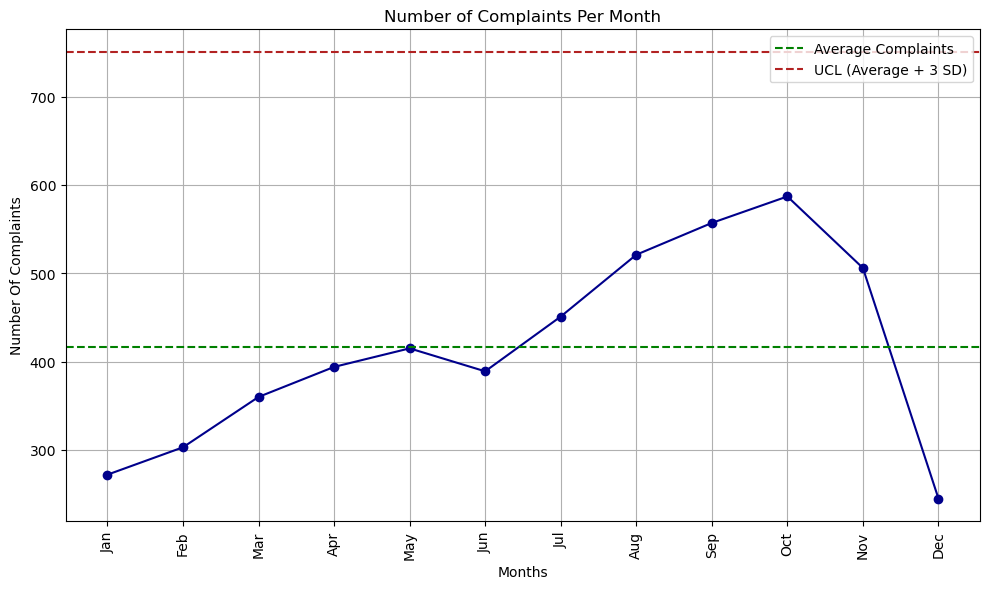

In [156]:
import matplotlib.pyplot as plt

# Setting the figure size
plt.figure(figsize=(10, 6))

# Set the Month column as the index
number_of_complaints = number_of_complaints.reindex(['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 
                                                      'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])

# Calculate Upper Control Limit
UCL = average_complaints + (3 * std_dev_complaints)

# Plotting the line graph
number_of_complaints.plot(kind='line', color='darkblue', marker='o',title='Number of Complaints Per Month')

# Set x-ticks to display every month
plt.xticks(ticks=range(len(number_of_complaints.index)), labels=number_of_complaints.index, rotation=90)

# Add a horizontal line for the average
plt.axhline(y=avg_number_of_complaints, color='green', linestyle='--', label='Average Complaints')

# Add a horizontal line for the UCL
plt.axhline(y=UCL, color='firebrick', linestyle='--', label='UCL (Average + 3 SD)')

# Set labels and position the legend
plt.xlabel('Months')
plt.ylabel('Number Of Complaints')
plt.legend(loc='upper right')
plt.xticks(rotation=90)

# Add a grid and apply tight layout
plt.grid(True)
plt.tight_layout()

# Show the plot
plt.show()